# Transfer Learning: Fine Tuning in TensorFlow

In [1]:
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"

--2021-08-17 21:09:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-08-17 21:09:02 (78.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
import tensorflow as tf
from helper_functions import *

## Import data

In [3]:
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip"
unzip_data("10_food_classes_10_percent.zip")

--2021-08-17 21:09:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   236MB/s    in 0.7s    

2021-08-17 21:09:05 (236 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/gr

In [5]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [6]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_data_10_percent = image_dataset_from_directory(directory=train_dir,
                                                     image_size=IMG_SIZE,
                                                     label_mode="categorical",
                                                     batch_size=BATCH_SIZE)

test_data = image_dataset_from_directory(directory=test_dir,
                                         image_size=IMG_SIZE,
                                         label_mode="categorical",
                                         batch_size=BATCH_SIZE)

train_data_10_percent

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [7]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [8]:
for images, labels in train_data_10_percent.take(1):
  print(images.shape, labels.shape)
  print(images, labels)

(32, 224, 224, 3) (32, 10)
tf.Tensor(
[[[[2.11891266e+02 1.94891266e+02 1.74891266e+02]
   [2.11830032e+02 1.94830032e+02 1.74830032e+02]
   [2.07847260e+02 1.91061539e+02 1.70418686e+02]
   ...
   [7.10375443e+01 5.64339676e+01 3.03116417e+01]
   [3.17361736e+01 2.58258266e+01 1.69959351e-01]
   [2.57120876e+01 2.57051525e+01 5.64173365e+00]]

  [[2.12647003e+02 1.95647003e+02 1.75647003e+02]
   [2.09463333e+02 1.92463333e+02 1.72463333e+02]
   [2.04590881e+02 1.87805176e+02 1.67162308e+02]
   ...
   [1.53454163e+02 1.38241211e+02 1.08501808e+02]
   [2.71924438e+01 1.87986755e+01 1.16403365e+00]
   [2.07422981e+01 1.84241009e+01 2.84307075e+00]]

  [[2.09611618e+02 1.92611618e+02 1.72611618e+02]
   [2.05397324e+02 1.88397324e+02 1.68397324e+02]
   [2.04897003e+02 1.88111282e+02 1.67468430e+02]
   ...
   [2.12050705e+02 1.94559372e+02 1.64001404e+02]
   [2.65821514e+01 1.51029434e+01 5.72808743e-01]
   [2.82387295e+01 2.24144402e+01 6.79186046e-01]]

  ...

  [[2.10540237e+02 1.8954023

## Model 0: Building a transfer learning model using the keras functional API

16719872/16705208 [==============================] - 0s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after global average pooling 2d: (None, 1280)
Saving TensorBoard log files to: transfer_learning/Model_0/20210817-210916
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 41s 264ms/step - loss: 1.8973 - accuracy: 0.3813 - val_loss: 1.3591 - val_accuracy: 0.6628
Epoch 2/5
24/24 [==============================] - 5s 187ms/step - loss: 1.1436 - accuracy: 0.7387 - val_loss: 0.9457 - val_accuracy: 0.7747
Epoch 3/5
24/24 [==============================] - 4s 156ms/step - loss: 0.8351 - accuracy: 0.8147 - val_loss: 0.7698 - val_accuracy: 0.7993
Epoch 4/5
24/24 [==============================] - 5s 187ms/step - loss: 0.6900 - accuracy: 0.8440 - val_loss: 0.6845 - val_accuracy: 0.8191
Epoch 5/5
24/24 [==============================] - 4s 147ms/step - loss: 0.5944 - accuracy: 0.8627 - val_loss: 0.6318 - val_accuracy: 0.8125

MODEL ACCURACY: 83.6%.



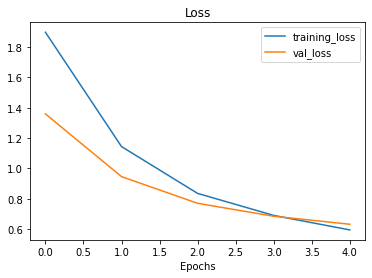

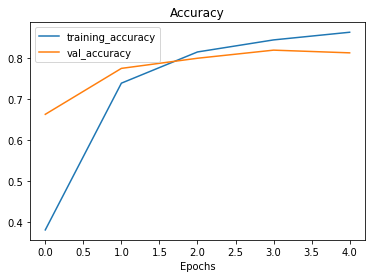

In [9]:
# create base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=IMG_SIZE+(3,), name="input_layer")

# if using ResNet50V2, you will need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(scale=1/255.)(inputs)

x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_avg_pooling_layer")(x)
print(f"Shape after global average pooling 2d: {x.shape}")

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs, name="baseline_model_EfficientNetB0")

model_0.compile(optimizer="adam",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

history_0 = model_0.fit(train_data_10_percent,
            epochs=5,
            steps_per_epoch=len(train_data_10_percent),
            validation_data=test_data,
            validation_steps=int(0.25*len(test_data)),
            callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                   experiment_name="Model_0")])

print(f"\nMODEL ACCURACY: {100*model_0.evaluate(test_data, verbose=False)[1]:.1f}%.\n")

plot_loss_curves(history_0)

In [10]:
model_0.name

'baseline_model_EfficientNetB0'

In [11]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [12]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_____________________________________________________________________________________

In [13]:
model_0.summary()

Model: "baseline_model_EfficientNetB0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_avg_pooling_layer (Gl (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


## Getting a feature vector from our trained model

We have a tesnror after our model goes through `base_model` of shape (None, 7, 7, 1280).

But then when it passes thruogh GlobalAveragePooling2D, it turns into (None, 1280).

Let's use a similar shaped tensor of (1, 4, 4, 3) and pass it to GlobalAveragePooling2D.

In [14]:
input_shape = (1, 4, 4, 3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)

print(f"Random input tensor:\n {input_tensor}.\n")

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

print(f"Average pooled tensor:\n {global_average_pooled_tensor}\n")

print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of global average pooled tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]].

Average pooled tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of global average pooled tensor: (1, 3)


In [15]:
# replicating the global average pool 2d layer
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

# Running a series of transfer learning experiments

## Getting and preprocessing data for model 1

In [16]:
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip"
unzip_data("10_food_classes_1_percent.zip")

--2021-08-17 21:10:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   265MB/s    in 0.5s    

2021-08-17 21:10:23 (265 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [17]:
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [18]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There a

In [19]:
IMG_SIZE = (224, 224)
train_data_1_percent = image_dataset_from_directory(train_dir_1_percent,
                                                    label_mode="categorical",
                                                    image_size=IMG_SIZE,
                                                    batch_size=BATCH_SIZE)

test_data = image_dataset_from_directory(test_dir,
                                         label_mode="categorical",
                                         image_size=IMG_SIZE,
                                         batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation right into the model

In [20]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# putting it in the model this will benefit from gpu accel 
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2)
], name="data_augmentation")

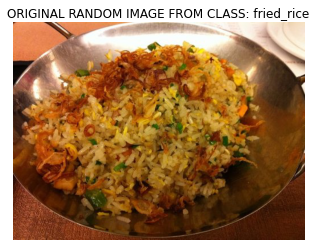

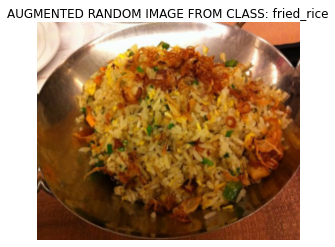

In [21]:
# view a random image and compare to aug version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"ORIGINAL RANDOM IMAGE FROM CLASS: {target_class}")
plt.axis(False)
plt.show()

aug_image = data_augmentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.imshow(tf.squeeze(aug_image)/255)
plt.title(f"AUGMENTED RANDOM IMAGE FROM CLASS: {target_class}")
plt.axis(False)
plt.show()

## Model 1: Feature extraction transfer learning on 1% of the training data with data augmentation

In [22]:
input_shape = (224, 224, 3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")

x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

history_1 = model_1.fit(train_data_1_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_1_percent),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="model_1_one_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/model_1_one_percent_data_aug/20210817-211028
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


3/3 [==============================] - 11s 3s/step - loss: 2.3586 - accuracy: 0.1143 - val_loss: 2.2214 - val_accuracy: 0.1727
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1854 - accuracy: 0.2143 - val_loss: 2.1128 - val_accuracy: 0.2336
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.9879 - accuracy: 0.4000 - val_loss: 2.0146 - val_accuracy: 0.3191
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.7851 - accuracy: 0.5571 - val_loss: 1.9099 - val_accuracy: 0.3898
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6834 - accuracy: 0.5571 - val_loss: 1.8328 - val_accuracy: 0.4391


In [23]:
model_1.summary()
model_1.evaluate(test_data, verbose=False)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


[1.826507806777954, 0.4431999921798706]

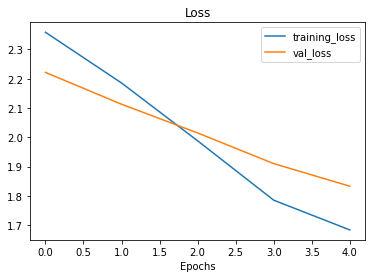

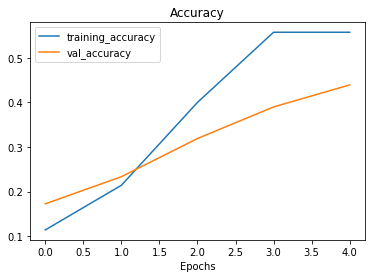

In [24]:
plot_loss_curves(history_1)

## Model 2: feature extraction transfer learning model with 10% of the data

In [25]:
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [26]:
IMG_SIZE = (224, 224)

train_data_10_percent = image_dataset_from_directory(train_dir_10_percent,
                                                     label_mode="categorical",
                                                     image_size=IMG_SIZE)

test_data = image_dataset_from_directory(test_dir,
                                         label_mode="categorical",
                                         image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [27]:
# create model 2 with data_augmentation built in
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2)
], name="data_augmentation_10_percent")

input_shape = (224, 224, 3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="glob_average_pooling")(x)
outputs = layers.Dense(10, activation="softmax")(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2")

model_2.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation_10_percent (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
glob_average_pooling (Global (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


### Creating a ModelCheckpoint callback

In [28]:
checkpoint_path = "ten_percent_model_checkpoint_weights/checpoint.ckpt"

# ModelCheckpoint callback to save the model weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose=1)

In [29]:
initial_epochs = 5
history_2 = model_2.fit(train_data_10_percent,
                        epochs=initial_epochs,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data = test_data,
                        validation_steps = int(0.25 * len(test_data)),
                        callbacks = [create_tensorboard_callback("transfer_learning", "model_2_10_percent_data_aug"),
                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/model_2_10_percent_data_aug/20210817-211109
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 19s 556ms/step - loss: 1.9833 - accuracy: 0.3840 - val_loss: 1.4807 - val_accuracy: 0.6760

Epoch 00001: saving model to ten_percent_model_checkpoint_weights/checpoint.ckpt
Epoch 2/5
24/24 [==============================] - 10s 392ms/step - loss: 1.3368 - accuracy: 0.6933 - val_loss: 1.0682 - val_accuracy: 0.7632

Epoch 00002: saving model to ten_percent_model_checkpoint_weights/checpoint.ckpt
Epoch 3/5
24/24 [==============================] - 9s 341ms/step - loss: 1.0627 - accuracy: 0.7360 - val_loss: 0.8483 - val_accuracy: 0.7961

Epoch 00003: saving model to ten_percent_model_checkpoint_weights/checpoint.ckpt
Epoch 4/5
24/24 [==============================] - 9s 357ms/step - loss: 0.8982 - accuracy: 0.7760 - val_loss: 0.7599 - val_accuracy: 0.8109

Epoch 00004: saving model to ten_percent_model_checkpoint_weights/checpoint.ckpt
Epoch 5/5
24/24 [==============================] - 9s 351ms/step - loss: 0.8038 - accuracy: 0.7947 - val_loss: 0.681

In [30]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 6s 74ms/step - loss: 0.6855 - accuracy: 0.8136


[0.6855046153068542, 0.8136000037193298]

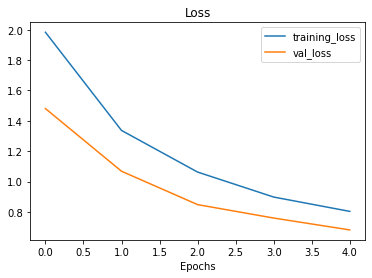

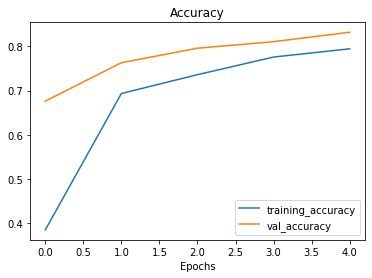

In [31]:
plot_loss_curves(history_2)

### Loading in checkpointed weights

In [32]:
# load and overwrite model_2
model_2.load_weights(checkpoint_path)
loaded_weights_model = model_2.evaluate(test_data)
loaded_weights_model == results_10_percent_data_aug

79/79 [==============================] - 6s 75ms/step - loss: 0.6855 - accuracy: 0.8136


False

In [33]:
import numpy as np
# may return False due toe precision storage
np.isclose(np.array(loaded_weights_model), np.array(results_10_percent_data_aug))

array([ True,  True])

## Model 3: Fine Tuning Transfer Learning (on 10% of the data)

Fine tuning usually works best after training a feature extraction model for a few epochs with large amounts of custom data

In [34]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7ff85a06ef90> True
<keras.engine.sequential.Sequential object at 0x7ff85a06eb50> True
<keras.engine.functional.Functional object at 0x7ff85ba2be90> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7ff85bbeea50> True
<keras.layers.core.Dense object at 0x7ff85baa6c90> True


In [35]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [36]:
# how many trainable variables in our base model
print(len(model_2.layers[2].trainable_variables))

0


In [37]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False

# recompile model
model_2.compile(loss="categorical_crossentropy",
                # set a low lr to prevent major changes from being made to our data
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=["accuracy"])

In [38]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [39]:
print(len(model_2.trainable_variables))

12


In [40]:
fine_tune_epochs = initial_epochs +5 
history_2_fine = model_2.fit(train_data_10_percent,
                             epochs=fine_tune_epochs,
                             steps_per_epoch=len(train_data_10_percent),
                             validation_data=test_data,
                             validation_steps = int(0.25*len(test_data)),
                             initial_epoch=history_2.epoch[-1],
                             callbacks=[create_tensorboard_callback("transfer_learning", "model_3_10_percent_fine_tune_last_10")]
                             )

Saving TensorBoard log files to: transfer_learning/model_3_10_percent_fine_tune_last_10/20210817-211225
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 18s 475ms/step - loss: 0.6848 - accuracy: 0.8173 - val_loss: 0.5408 - val_accuracy: 0.8405
Epoch 6/10
24/24 [==============================] - 8s 320ms/step - loss: 0.5767 - accuracy: 0.8307 - val_loss: 0.4844 - val_accuracy: 0.8388
Epoch 7/10
24/24 [==============================] - 10s 386ms/step - loss: 0.5196 - accuracy: 0.8467 - val_loss: 0.5011 - val_accuracy: 0.8405
Epoch 8/10
24/24 [==============================] - 8s 305ms/step - loss: 0.4723 - accuracy: 0.8573 - val_loss: 0.4933 - val_accuracy: 0.8454
Epoch 9/10
24/24 [==============================] - 8s 342ms/step - loss: 0.4083 - accuracy: 0.8787 - val_loss: 0.4838 - val_accuracy: 0.8454
Epoch 10/10
24/24 [==============================] - 9s 381ms/step - loss: 0.3675 - accuracy: 0.8867 - val_loss: 0.4851 - val_accuracy: 0.8388


In [41]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 70ms/step - loss: 0.4812 - accuracy: 0.8336


[0.48120883107185364, 0.8335999846458435]

In [42]:
results_10_percent_data_aug

[0.6855046153068542, 0.8136000037193298]

In [43]:
# 3% performance gain by fine tuning our model

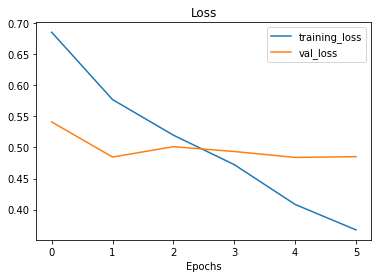

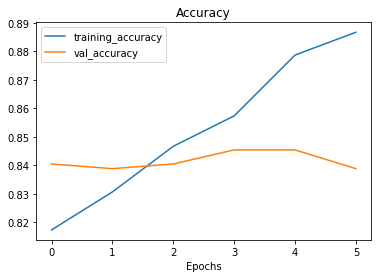

In [44]:
plot_loss_curves(history_2_fine)
# only plotting the last 5 epochs of our history, want to compare one series of 
# running fit with another

In [45]:
def compare_historys(original_history, new_history, initial_epochs):
  """
  Compares two TensorFlow History objects.
  """
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]
  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]
  
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]
  
  total_val_acc = acc + new_history.history["val_accuracy"]
  total_val_loss = loss + new_history.history["val_loss"]
  
  plt.figure(figsize=(8,8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="start fine tuning")
  plt.legend(loc="lower right")
  plt.title("Training & Val Accuracy")

  plt.subplot(2, 1, 2)
  plt.plot(loss, label="Training Loss")
  plt.plot(total_val_loss, label="Val Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="start fine tuning")
  plt.legend(loc="upper right")
  plt.title("Training & Val Loss")

  plt.show()

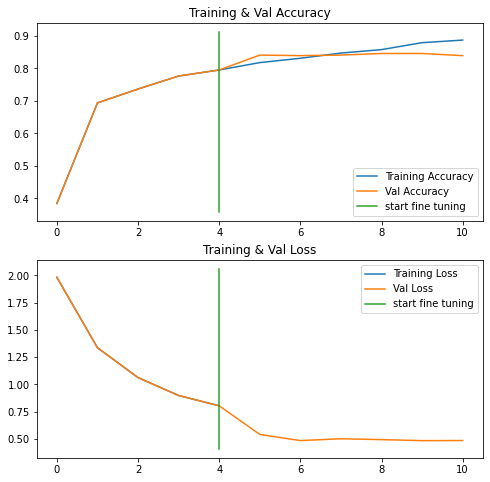

In [46]:
compare_historys(history_2,
                 history_2_fine,
                 5)

## Model 4: Fine Tuning with full dataset

In [47]:
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"
unzip_data("10_food_classes_all_data.zip")

--2021-08-17 21:13:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   213MB/s    in 2.3s    

2021-08-17 21:13:41 (213 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [48]:
train_all_dir = "10_food_classes_all_data/train"
test_all_dir = "10_food_classes_all_data/test"

In [49]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.

In [50]:
train_data_10_classes_full = image_dataset_from_directory(train_all_dir,
                                                          label_mode="categorical",
                                                          image_size=IMG_SIZE)

test_data = image_dataset_from_directory(test_all_dir,
                                         label_mode="categorical",
                                         image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [51]:
# now fine tuning model 2 on more data, model 2 trained initially on 10% dir
# this allows for a fair comparison of model 3 with model 4
model_2.load_weights(checkpoint_path)

In [52]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 71ms/step - loss: 0.6855 - accuracy: 0.8136


[0.6855047941207886, 0.8136000037193298]

In [53]:
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation_10_percent True
2 efficientnetb0 True
3 glob_average_pooling True
4 dense True


In [54]:
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [58]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=["accuracy"])

fine_tune_epochs = initial_epochs + 5
history_4 = model_2.fit(train_data_10_classes_full,
                        epochs=fine_tune_epochs,
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        initial_epoch=history_2.epoch[-1],
                        callbacks=[create_tensorboard_callback("transfer_learning",
                                                               "model_4_full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/model_4_full_10_classes_fine_tune_last_10/20210817-211508
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


235/235 [==============================] - 44s 165ms/step - loss: 0.7346 - accuracy: 0.7649 - val_loss: 0.4082 - val_accuracy: 0.8651
Epoch 6/10
235/235 [==============================] - 48s 200ms/step - loss: 0.5872 - accuracy: 0.8139 - val_loss: 0.3485 - val_accuracy: 0.8816
Epoch 7/10
235/235 [==============================] - 47s 196ms/step - loss: 0.5356 - accuracy: 0.8339 - val_loss: 0.3087 - val_accuracy: 0.8931
Epoch 8/10
235/235 [==============================] - 42s 178ms/step - loss: 0.4982 - accuracy: 0.8360 - val_loss: 0.3179 - val_accuracy: 0.8931
Epoch 9/10
235/235 [==============================] - 40s 169ms/step - loss: 0.4514 - accuracy: 0.8555 - val_loss: 0.3025 - val_accuracy: 0.8882
Epoch 10/10
235/235 [==============================] - 37s 158ms/step - loss: 0.4221 - accuracy: 0.8664 - val_loss: 0.2987 - val_accuracy: 0.9030


In [59]:
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 6s 71ms/step - loss: 0.3059 - accuracy: 0.9020


[0.3058876395225525, 0.9020000100135803]

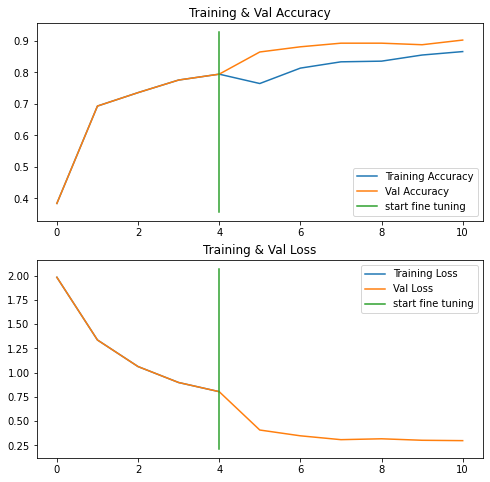

In [62]:
compare_historys(history_2, history_4, 5)

## Viewing our experiment data on TensorBoard

In [63]:
!tensorboard dev upload --logdir ./transfer_learning/ \
--name "Transfer Learning Experiments with 10 Food-101 Classes" \
--description "A series of different transfer learning experiments with varying amounts of data and augmentation" \
--one_shot

2021-08-17 21:22:30.954357: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-17 21:22:30.969966: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-17 21:22:30.970495: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Pri